In [22]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines  gym-anytrading gym

In [23]:
pip install stable-baselines3

Note: you may need to restart the kernel to use updated packages.


In [24]:
#Gym Environment
import gym
import gym_anytrading

# Stable baselines 
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import MlpPolicy
from stable_baselines.sac.policies import MlpPolicy
from stable_baselines.common.policies import MlpPolicy,MlpLstmPolicy, MlpLnLstmPolicy
from stable_baselines import ACKTR, PPO2

from stable_baselines3 import PPO,TD3,SAC,DQN,A2C
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from stable_baselines3.common.env_util import make_vec_env


# Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('data/monitor.csv') #Veriseti okutuldu.

In [26]:
df.tail() #Verisetinin son 5 verisi tablo halinde gösterildi.

,Date,Open,High,Low,Close,Adj Close,Volume
2826,2021-03-25,36.869999,37.750000,36.630001,37.660000,37.660000,47517900
2827,2021-03-26,38.349998,38.759998,38.080002,38.680000,38.680000,66733600
2828,2021-03-29,38.049999,38.630001,37.860001,38.310001,38.310001,45680000
2829,2021-03-30,38.630001,39.459999,38.630001,38.990002,38.990002,56705900
2830,2021-03-31,38.619999,38.990002,38.459999,38.689999,38.689999,49270000


In [27]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes
#Date türünü datetime yapıldı.

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [28]:
df.set_index('Date', inplace=True)
df.tail()
#Normalde ilk indexte rakamlarla sıralama vardı fakat bu şekilde tarihe göre sıralandı.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-25,36.869999,37.750000,36.630001,37.660000,37.660000,47517900
2021-03-26,38.349998,38.759998,38.080002,38.680000,38.680000,66733600
2021-03-29,38.049999,38.630001,37.860001,38.310001,38.310001,45680000
2021-03-30,38.630001,39.459999,38.630001,38.990002,38.990002,56705900
2021-03-31,38.619999,38.990002,38.459999,38.689999,38.689999,49270000


In [29]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5) #stocksEnv
#env = gym.make('forex-v0', df = df,window_size = 10,frame_bound = (10, 300),unit_side = 'right')  forexEnv

#İki ortam da denendi fakat bizim projemiz için ikisinin arasında bir fark olmadığı gözlendi. 
#forexEnv FOREX piyasası için ayırt edici bazı özellikler içerirken, stocksEnv ise BORSA piyasası için ayırt edici özelliklere sahip. 
#Bu proje için kullanılacak environment : "stocksEnv"

In [30]:
env.prices #Fiyatlar alındı.

array([15.06000042, 15.68999958, 16.20000076, 16.38999939, 16.93000031,
       16.78000069, 16.93000031, 16.36000061, 16.62000084, 16.81999969,
       16.26000023, 16.31999969, 16.48999977, 15.47000027, 14.89999962,
       14.97999954, 14.77000046, 15.18999958, 15.36999989, 15.18000031,
       15.42000008, 15.60000038, 15.52999973, 14.75      , 15.        ,
       14.47999954, 14.47000027, 14.67000008, 14.63000011, 14.44999981,
       15.15999985, 15.65999985, 15.88000011, 15.88000011, 16.20999908,
       15.93999958, 16.32999992, 16.54999924, 16.65999985, 16.70999908,
       16.45999908, 16.37000084, 16.39999962, 16.70000076, 16.73999977,
       16.79999924, 17.11000061, 17.12000084, 16.85000038, 16.85000038,
       17.03000069, 17.27000046, 17.07999992, 16.81999969, 16.95999908,
       17.12999916, 17.56999969, 17.73999977, 17.89999962, 18.04000092,
       17.76000023, 17.85000038, 18.04000092, 18.12999916, 18.48999977,
       18.62000084, 18.64999962, 18.59000015, 18.65999985, 18.67

In [31]:
env.action_space #Burada enivronmentın 2 seçeneği olduğu gözlendi : buy , sell.

Discrete(2)

info {'total_reward': -3.6499977111816477, 'total_profit': 0.5581766840907115, 'position': 0}


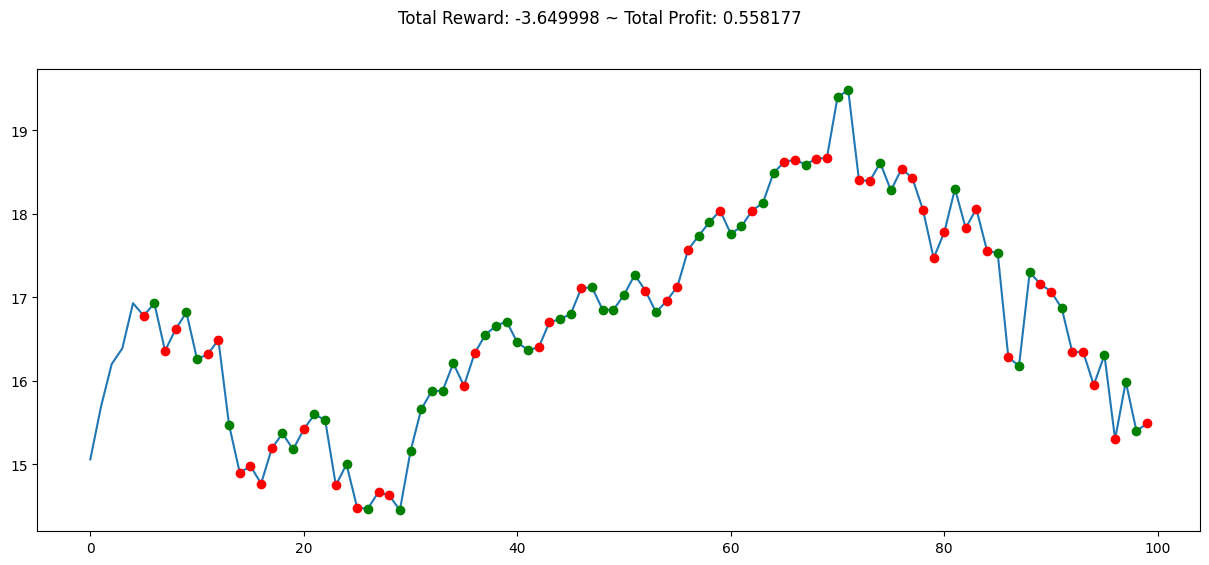

In [32]:
state = env.reset() #Ortam çalıştırıldı.
while True: #Sonsuz Döngü
    action = env.action_space.sample() #Sample metodu ile rastgele birkaç adım atılarak bu adımlar action değişkenine atıldı.
    n_state, reward, done, info = env.step(action) #Env actionunu çağırdık ve soldaki değişkenler actiona göre atandı.
    if done: 
        print("info", info)  #Alt kısımda gördüğümüz info kısmı yazdırıldı.
        break  #Döngü kırıldı.
        
plt.figure(figsize=(15,6)) #Matplotlib kullanılarak grafik yeniden boyutlandırıldı ve boyutlar ayarlandı.
plt.cla()
env.render_all() #Belirlediğimiz gerçekleşen veya gerçekleşmiş tüm farklı işlemlerin işlenmesine izin verildi.
plt.show() #Görseli görmek sağlandı.

#Aşağıdaki yeşil ve kırmızı renkler ise kırmızı noktalar, Short'u temsil ederken yeşil noktalar Long'u temsil etmektedir.
#Long(yeşil nokta) bir hissenin fiyatının artacağını tahmin ederek az paradan satın almak demektir.
#Short(kırmızı nokta) ise bir hissenin fiyatlarını düşeceğinin tahmin ederek çok paradan satmak demektir.
#Aşağıdaki grafikte rastgele alım satım olduğundan ödül şuan ilgilendirmemekte, toplam kâr ise 1'in altındaysa zarar vardır.


In [13]:
#DummyDecEnv Geçerli Python işleminde her ortamı sırayla çağıran birden çok ortam için bir vektörleştirilmiş sarmalayıcı oluşturur.
#Burada ortam eğitime hazır hale getirildi.
#lambda bir fonksiyon içinde kullanıldığı zaman o fonksiyonu kişiselleştirmek sağlanır, env_maker'ı tekrar kullanmak için yazıldı.

env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])  #DummyVecEnv'in içine kendi ortamımızı aktardık.

In [33]:
#ACKTR Algorithm


import time 
start_time = time.time() #başlangıç zamanı değişkeni oluşturuyoruz

model = ACKTR(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=100000)
print(  (time.time() - start_time)/60) #tüm zamandan başlangıç zamanını çıkarıp 60 ile çarpıp kaç dakika çalıştığını görüyoruz

Wrapping the env in a DummyVecEnv.
---------------------------------
| explained_variance | -0.0278  |
| fps                | 11       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| policy_loss        | -0.789   |
| total_timesteps    | 20       |
| value_loss         | 1.94     |
---------------------------------
---------------------------------
| explained_variance | -0.00214 |
| fps                | 284      |
| nupdates           | 100      |
| policy_entropy     | 0.392    |
| policy_loss        | 0.0755   |
| total_timesteps    | 2000     |
| value_loss         | 0.102    |
---------------------------------
---------------------------------
| explained_variance | 0.0104   |
| fps                | 322      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| policy_loss        | 0.221    |
| total_timesteps    | 4000     |
| value_loss         | 0.168    |
---------------------------------
---------------------------------
| explained_v

---------------------------------
| explained_variance | 0.533    |
| fps                | 373      |
| nupdates           | 2700     |
| policy_entropy     | 0.678    |
| policy_loss        | 0.0658   |
| total_timesteps    | 54000    |
| value_loss         | 0.0495   |
---------------------------------
---------------------------------
| explained_variance | 0.521    |
| fps                | 374      |
| nupdates           | 2800     |
| policy_entropy     | 0.614    |
| policy_loss        | 0.0299   |
| total_timesteps    | 56000    |
| value_loss         | 0.0578   |
---------------------------------
---------------------------------
| explained_variance | 0.318    |
| fps                | 373      |
| nupdates           | 2900     |
| policy_entropy     | 0.554    |
| policy_loss        | -0.737   |
| total_timesteps    | 58000    |
| value_loss         | 1.56     |
---------------------------------
---------------------------------
| explained_variance | 0.423    |
| fps         

In [ ]:
"""
explained_variance -> Basitçe söylemek gerekirse, beklenen değer ile tahmin edilen değer arasındaki farktır.  modelinin tahminlerindeki değişkenliğin oranını ölçmek için kullanılır.Varyans değeri 1’e ne kadar yakınsa model o kadar iyi iş yapıyor demektir.
Varyans değeri 1’e ne kadar yakınsa model o kadar iyi iş yapıyor demektir.
fps -> Saniyedeki kare sayısı (gradyan güncellemesi tarafından geçen süre dahil)
n_updates -> şu ana kadar uygulanan gradyan güncellemelerinin sayısı
policy_entropy -> policy’ye dayalı gradyan tabanlı yöntemler için reinforcement algoritmalarında kullanılır. Ortamdaki düzensizliği ölçmek için kullanılır.
policy_loss -> politikanın istenen davranışa göre ne kadar iyi performans gösterdiğinin bir ölçüsüdür.
total_timesteps -> yapay zekayı eğiten kişi tarafından belirlenen adım sayısı olarak değerlindirilebilir.
value_loss -> ne kadar değer kaybedildiği gösteriliyor.
"""

In [34]:
#PPO2 Algorithm

import time
start_time = time.time() #başlangıç zamanı değişkeni oluşturuyoruz

model = PPO2(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=1000)

print(  (time.time() - start_time)/60) #tüm zamandan başlangıç zamanını çıkarıp 60 ile çarpıp kaç dakika çalıştığını görüyoruz

Wrapping the env in a DummyVecEnv.
--------------------------------------
| approxkl           | 7.44626e-05   |
| clipfrac           | 0.0           |
| explained_variance | 0.0223        |
| fps                | 168           |
| n_updates          | 1             |
| policy_entropy     | 0.6930821     |
| policy_loss        | 0.00026730378 |
| serial_timesteps   | 128           |
| time_elapsed       | 0             |
| total_timesteps    | 128           |
| value_loss         | 0.17032117    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00021578335 |
| clipfrac           | 0.0           |
| explained_variance | -0.0048       |
| fps                | 436           |
| n_updates          | 2             |
| policy_entropy     | 0.69303215    |
| policy_loss        | -0.0014659502 |
| serial_timesteps   | 256           |
| time_elapsed       | 0.76          |
| total_timesteps    | 256           |
| value_loss         | 0.2460

In [ ]:
"""
approx_kl -> eski ve yeni politika arasındaki yaklaşık ortalama KL farklılığı (PPO için), güncellemede ne kadar değişiklik olduğuna dair bir tahmindir

explained_variance -> Basitçe söylemek gerekirse, beklenen değer ile tahmin edilen değer arasındaki farktır.  modelinin tahminlerindeki değişkenliğin oranını ölçmek için kullanılır.
Varyans değeri 1’e ne kadar yakınsa model o kadar iyi iş yapıyor demektir.
fps -> Saniyedeki kare sayısı (gradyan güncellemesi tarafından geçen süre dahil)
n_updates -> Şu ana kadar uygulanan gradyan güncellemelerinin sayısı
policy_entropy -> policy’ye dayalı gradyan tabanlı yöntemler için reinforcement algoritmalarında kullanılır. Ortamdaki düzensizliği ölçmek için kullanılır.
policy_loss -> politikanın istenen davranışa göre ne kadar iyi performans gösterdiğinin bir ölçüsüdür.
serial_timesteps -> bu algoritmada total timesteps ile aynı özellikleri taşır.
time_elapsed -> Modelin başlamasından itibaren geçen süreyi saniye cinsinden gösterir.
total_timesteps -> yapay zekayı eğiten kişi tarafından belirlenen adım sayısı olarak değerlindirilebilir.
value_loss -> ne kadar değer kaybedildiği gösteriliyor.
"""

In [64]:
#A2C Algorithm

import time
start_time = time.time() #başlangıç zamanı değişkeni oluşturuyoruz

env = make_vec_env("CartPole-v1", n_envs=4)

model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000)
print(  (time.time() - start_time)/60) #tüm zamandan başlangıç zamanını çıkarıp 60 ile çarpıp kaç dakika çalıştığını görüyoruz

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 26.9     |
|    ep_rew_mean        | 26.9     |
| time/                 |          |
|    fps                | 5240     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -0.57    |
|    explained_variance | -0.208   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.81     |
|    value_loss         | 9.17     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 33.8     |
|    ep_rew_mean        | 33.8     |
| time/                 |          |
|    fps                | 5321     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 4000     |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 101      |
|    ep_rew_mean        | 101      |
| time/                 |          |
|    fps                | 5258     |
|    iterations         | 1400     |
|    time_elapsed       | 5        |
|    total_timesteps    | 28000    |
| train/                |          |
|    entropy_loss       | -0.562   |
|    explained_variance | 5.29e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 1399     |
|    policy_loss        | 0.72     |
|    value_loss         | 2.28     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 112      |
|    ep_rew_mean        | 112      |
| time/                 |          |
|    fps                | 5266     |
|    iterations         | 1500     |
|    time_elapsed       | 5        |
|    total_timesteps    | 30000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 196      |
|    ep_rew_mean        | 196      |
| time/                 |          |
|    fps                | 5315     |
|    iterations         | 2700     |
|    time_elapsed       | 10       |
|    total_timesteps    | 54000    |
| train/                |          |
|    entropy_loss       | -0.526   |
|    explained_variance | 1.37e-06 |
|    learning_rate      | 0.0007   |
|    n_updates          | 2699     |
|    policy_loss        | 0.00456  |
|    value_loss         | 0.000134 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 191      |
|    ep_rew_mean        | 191      |
| time/                 |          |
|    fps                | 5315     |
|    iterations         | 2800     |
|    time_elapsed       | 10       |
|    total_timesteps    | 56000    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 132       |
|    ep_rew_mean        | 132       |
| time/                 |           |
|    fps                | 5333      |
|    iterations         | 4000      |
|    time_elapsed       | 14        |
|    total_timesteps    | 80000     |
| train/                |           |
|    entropy_loss       | -0.451    |
|    explained_variance | -0.000118 |
|    learning_rate      | 0.0007    |
|    n_updates          | 3999      |
|    policy_loss        | 0.00281   |
|    value_loss         | 8.09e-05  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 135       |
|    ep_rew_mean        | 135       |
| time/                 |           |
|    fps                | 5331      |
|    iterations         | 4100      |
|    time_elapsed       | 15        |
|    total_timesteps    | 82000     |
| train/    

In [ ]:
"""
explained_variance -> Basitçe söylemek gerekirse, beklenen değer ile tahmin edilen değer arasındaki farktır.  modelinin tahminlerindeki değişkenliğin oranını ölçmek için kullanılır.
Varyans değeri 1’e ne kadar yakınsa model o kadar iyi iş yapıyor demektir.
fps -> Saniyedeki kare sayısı (gradyan güncellemesi tarafından geçen süre dahil)
n_updates -> şu ana kadar uygulanan gradyan güncellemelerinin sayısı
policy_entropy -> policy’ye dayalı gradyan tabanlı yöntemler için reinforcement algoritmalarında kullanılır. Ortamdaki düzensizliği ölçmek için kullanılır.
total_timesteps -> yapay zekayı eğiten kişi tarafından belirlenen adım sayısı olarak değerlindirilebilir.
value_loss -> ne kadar değer kaybedildiği gösteriliyor.
"""

In [17]:
#PPO Algorithm

import time
start_time = time.time() #başlangıç zamanı değişkeni oluşturuyoruz

env = make_vec_env("CartPole-v1", n_envs=4) #PPO algoritması Stable-Baselines 3 algoritmasıdır, o yüzden kendi çevresi oluşturuldu

model = PPO("MlpPolicy", env, verbose=1) #Model oluşturuldu, PPO algoritması modele entegre edildi.
model.learn(total_timesteps=100000)  #timesteps özelliği ile belirlenen zaman dilimi kadar al sat yapılır.
print(  (time.time() - start_time)/60) #tüm zamandan başlangıç zamanını çıkarıp 60 ile çarpıp kaç dakika çalıştığını görüyoruz 

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | 23.6     |
| time/              |          |
|    fps             | 9738     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 8192     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 32.4        |
|    ep_rew_mean          | 32.4        |
| time/                   |             |
|    fps                  | 3563        |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.014234343 |
|    clip_fraction        | 0.208       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.682      |
|    explained_variance   | -0.00186    |
|    learning

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 447          |
|    ep_rew_mean          | 447          |
| time/                   |              |
|    fps                  | 2261         |
|    iterations           | 11           |
|    time_elapsed         | 39           |
|    total_timesteps      | 90112        |
| train/                  |              |
|    approx_kl            | 0.0058959024 |
|    clip_fraction        | 0.0525       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.503       |
|    explained_variance   | 0.211        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.282        |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.00272     |
|    value_loss           | 1.02         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

In [ ]:
"""
rollout/
ep_len mean( Mean episode length) -> Ortalama bölüm uzunluğu (ortalama 100 bölümün üzerinde)
ep_rew mean(Mean Episodic Reward) -> Ortalama epizodik eğitim ödülü (ortalama 100 bölümün üzerinde)

time/
fps-> Saniyedeki kare sayısı (gradyan güncellemesi tarafından geçen süre dahil)
iterations -> Yineleme sayısı
time_elapsed -> Modelin başlamasından itibaren geçen süreyi saniye cinsinden gösterir.
total_timesteps -> yapay zekayı eğiten kişi tarafından belirlenen adım sayısı olarak değerlindirilebilir.

train/
approx_kl -> eski ve yeni politika arasındaki yaklaşık ortalama KL farklılığı (PPO için), güncellemede ne kadar değişiklik olduğuna dair bir tahmindir
clip_fraction -> PPO için kırpılan (clips_range eşiğinin üzerinde) temsili kaybın ortalama fraksiyonu.
clip_range -> PPO vekil(surrogate) kaybı için kırpma faktörünün mevcut değeri
entropy_loss -> Entropi kaybının ortalama değeri (ortalama politika entropisinin negatifi)
Explained variance, Basitçe söylemek gerekirse, beklenen değer ile tahmin edilen değer arasındaki farktır.  modelinin tahminlerindeki değişkenliğin oranını ölçmek için kullanılır.
Varyans değeri 1’e ne kadar yakınsa model o kadar iyi iş yapıyor demektir.
learning_rate -> Mevcut öğrenme oranı değeri
loss -> Mevcut toplam kayıp değeri
Nupdates -> şu ana kadar uygulanan gradyan güncellemelerinin sayısı
policy_gradient_loss -> Politika gradyan kaybının mevcut değeri (değerinin fazla bir anlamı yoktur)
value_loss -> ne kadar değer kaybedildiği gösteriliyor.
"""

In [18]:
#TD3 Algorithm

import time
start_time = time.time() #başlangıç zamanı değişkeni oluşturuyoruz

env = gym.make('Pendulum-v1') #TD3 algoritması Stable-Baselines 3 algoritmasıdır, o yüzden kendi çevresi oluşturuldu
#  Reinforcement learning algoritmamıza eklenecek bir tür gürültüyü temsil eden "action_noise" adlı bir nesne tanımlandı.
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = TD3("MlpPolicy", env, action_noise=action_noise, verbose=1) #Model oluşturuldu, TD3 algoritması modele entegre edildi.
model.learn(total_timesteps=100000, log_interval=10) #timesteps özelliği ile belirlenen zaman dilimi kadar al sat yapılır.

print(  (time.time() - start_time)/60) #tüm zamandan başlangıç zamanını çıkarıp 60 ile çarpıp kaç dakika çalıştığını görüyoruz

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.53e+03 |
| time/              |           |
|    episodes        | 10        |
|    fps             | 149       |
|    time_elapsed    | 13        |
|    total_timesteps | 2000      |
| train/             |           |
|    actor_loss      | 32.8      |
|    critic_loss     | 0.0906    |
|    learning_rate   | 0.001     |
|    n_updates       | 1800      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.42e+03 |
| time/              |           |
|    episodes        | 20        |
|    fps             | 132       |
|    time_elapsed    | 30        |
|    total_timesteps | 4000      |
| train/             |           |
|    actor_loss      | 63.1    

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -159     |
| time/              |          |
|    episodes        | 170      |
|    fps             | 114      |
|    time_elapsed    | 296      |
|    total_timesteps | 34000    |
| train/             |          |
|    actor_loss      | 43.6     |
|    critic_loss     | 5.9      |
|    learning_rate   | 0.001    |
|    n_updates       | 33800    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -157     |
| time/              |          |
|    episodes        | 180      |
|    fps             | 114      |
|    time_elapsed    | 313      |
|    total_timesteps | 36000    |
| train/             |          |
|    actor_loss      | 42.2     |
|    critic_loss     | 6.5      |
|    learning_rate   | 0.001    |
|    n_updates       | 35800    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -162     |
| time/              |          |
|    episodes        | 340      |
|    fps             | 113      |
|    time_elapsed    | 601      |
|    total_timesteps | 68000    |
| train/             |          |
|    actor_loss      | 29       |
|    critic_loss     | 5.07     |
|    learning_rate   | 0.001    |
|    n_updates       | 67800    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -163     |
| time/              |          |
|    episodes        | 350      |
|    fps             | 112      |
|    time_elapsed    | 620      |
|    total_timesteps | 70000    |
| train/             |          |
|    actor_loss      | 27.7     |
|    critic_loss     | 5.6      |
|    learning_rate   | 0.001    |
|    n_updates       | 69800    |
--------------

15.314193665981293


In [ ]:
"""
rollout/
ep_len mean( Mean episode length) -> Ortalama bölüm uzunluğu (ortalama 100 bölümün üzerinde)
ep_rew mean(Mean Episodic Reward) -> Ortalama epizodik eğitim ödülü (ortalama 100 bölümün üzerinde)

time/
episodes -> Toplam bölüm sayısı
fps -> Saniyedeki kare sayısı (gradyan güncellemesi tarafından geçen süre dahil)
time_elapsed -> Modelin başlamasından itibaren geçen süreyi saniye cinsinden gösterir.
total_timesteps -> Yapay zekayı eğiten kişi tarafından belirlenen adım sayısı olarak değerlindirilebilir.

train/
actor_loss -> Politika dışı algoritmalar için aktör kaybı için geçerli değer
critic_loss -> İlke dışı algoritmalar için kritik işlev kaybı için geçerli değer, genellikle değer işlevi çıkışı ile TD(0) arasındaki hata, zamansal fark tahmini
learning_rate -> Mevcut öğrenme oranı değeri
n_updates -> şu ana kadar uygulanan gradyan güncellemelerinin sayısı
"""

In [19]:
#SAC Algorithm

import time
start_time = time.time() #başlangıç zamanı değişkeni oluşturuyoruz

env = gym.make("Pendulum-v1") #SAC algoritması Stable-Baselines 3 algoritmasıdır, o yüzden kendi çevresi oluşturuldu

model = SAC("MlpPolicy", env, verbose=1) #Model oluşturuldu, SAC algoritması modele entegre edildi.
model.learn(total_timesteps=100000, log_interval=4)  #timesteps özelliği ile belirlenen zaman dilimi kadar al sat yapılır.
print(  (time.time() - start_time)/60) #tüm zamandan başlangıç zamanını çıkarıp 60 ile çarpıp kaç dakika çalıştığını görüyoruz

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.36e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 103       |
|    time_elapsed    | 7         |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 22        |
|    critic_loss     | 0.241     |
|    ent_coef        | 0.812     |
|    ent_coef_loss   | -0.322    |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.33e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 92        |
|    time_elapsed    | 17        |
|    total_timesteps | 1600    

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -429     |
| time/              |          |
|    episodes        | 60       |
|    fps             | 82       |
|    time_elapsed    | 145      |
|    total_timesteps | 12000    |
| train/             |          |
|    actor_loss      | 52       |
|    critic_loss     | 1.28     |
|    ent_coef        | 0.0781   |
|    ent_coef_loss   | -0.00598 |
|    learning_rate   | 0.0003   |
|    n_updates       | 11899    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -410     |
| time/              |          |
|    episodes        | 64       |
|    fps             | 82       |
|    time_elapsed    | 154      |
|    total_timesteps | 12800    |
| train/             |          |
|    actor_loss      | 46.6     |
|    critic_loss     | 1.27     |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -162     |
| time/              |          |
|    episodes        | 120      |
|    fps             | 82       |
|    time_elapsed    | 290      |
|    total_timesteps | 24000    |
| train/             |          |
|    actor_loss      | 28.2     |
|    critic_loss     | 0.68     |
|    ent_coef        | 0.0312   |
|    ent_coef_loss   | 0.384    |
|    learning_rate   | 0.0003   |
|    n_updates       | 23899    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -152     |
| time/              |          |
|    episodes        | 124      |
|    fps             | 82       |
|    time_elapsed    | 300      |
|    total_timesteps | 24800    |
| train/             |          |
|    actor_loss      | 28.1     |
|    critic_loss     | 0.755    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -157     |
| time/              |          |
|    episodes        | 180      |
|    fps             | 82       |
|    time_elapsed    | 437      |
|    total_timesteps | 36000    |
| train/             |          |
|    actor_loss      | 25.1     |
|    critic_loss     | 0.892    |
|    ent_coef        | 0.0529   |
|    ent_coef_loss   | -0.0117  |
|    learning_rate   | 0.0003   |
|    n_updates       | 35899    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -158     |
| time/              |          |
|    episodes        | 184      |
|    fps             | 82       |
|    time_elapsed    | 447      |
|    total_timesteps | 36800    |
| train/             |          |
|    actor_loss      | 18       |
|    critic_loss     | 0.357    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -157     |
| time/              |          |
|    episodes        | 240      |
|    fps             | 82       |
|    time_elapsed    | 578      |
|    total_timesteps | 48000    |
| train/             |          |
|    actor_loss      | 23.9     |
|    critic_loss     | 0.562    |
|    ent_coef        | 0.0412   |
|    ent_coef_loss   | -0.515   |
|    learning_rate   | 0.0003   |
|    n_updates       | 47899    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -157     |
| time/              |          |
|    episodes        | 244      |
|    fps             | 82       |
|    time_elapsed    | 588      |
|    total_timesteps | 48800    |
| train/             |          |
|    actor_loss      | 24.6     |
|    critic_loss     | 0.875    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -144     |
| time/              |          |
|    episodes        | 300      |
|    fps             | 82       |
|    time_elapsed    | 723      |
|    total_timesteps | 60000    |
| train/             |          |
|    actor_loss      | 18.6     |
|    critic_loss     | 0.502    |
|    ent_coef        | 0.0342   |
|    ent_coef_loss   | 0.493    |
|    learning_rate   | 0.0003   |
|    n_updates       | 59899    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -144     |
| time/              |          |
|    episodes        | 304      |
|    fps             | 82       |
|    time_elapsed    | 732      |
|    total_timesteps | 60800    |
| train/             |          |
|    actor_loss      | 22.1     |
|    critic_loss     | 0.707    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -142     |
| time/              |          |
|    episodes        | 360      |
|    fps             | 82       |
|    time_elapsed    | 869      |
|    total_timesteps | 72000    |
| train/             |          |
|    actor_loss      | 17.5     |
|    critic_loss     | 0.305    |
|    ent_coef        | 0.0323   |
|    ent_coef_loss   | -0.408   |
|    learning_rate   | 0.0003   |
|    n_updates       | 71899    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -147     |
| time/              |          |
|    episodes        | 364      |
|    fps             | 82       |
|    time_elapsed    | 878      |
|    total_timesteps | 72800    |
| train/             |          |
|    actor_loss      | 15.9     |
|    critic_loss     | 0.201    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -145     |
| time/              |          |
|    episodes        | 420      |
|    fps             | 82       |
|    time_elapsed    | 1021     |
|    total_timesteps | 84000    |
| train/             |          |
|    actor_loss      | 18.8     |
|    critic_loss     | 0.593    |
|    ent_coef        | 0.0269   |
|    ent_coef_loss   | -0.0185  |
|    learning_rate   | 0.0003   |
|    n_updates       | 83899    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -142     |
| time/              |          |
|    episodes        | 424      |
|    fps             | 82       |
|    time_elapsed    | 1031     |
|    total_timesteps | 84800    |
| train/             |          |
|    actor_loss      | 17.1     |
|    critic_loss     | 0.321    |
|    ent_coef 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -147     |
| time/              |          |
|    episodes        | 480      |
|    fps             | 82       |
|    time_elapsed    | 1170     |
|    total_timesteps | 96000    |
| train/             |          |
|    actor_loss      | 13.9     |
|    critic_loss     | 0.265    |
|    ent_coef        | 0.0294   |
|    ent_coef_loss   | -0.62    |
|    learning_rate   | 0.0003   |
|    n_updates       | 95899    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -144     |
| time/              |          |
|    episodes        | 484      |
|    fps             | 82       |
|    time_elapsed    | 1179     |
|    total_timesteps | 96800    |
| train/             |          |
|    actor_loss      | 18.4     |
|    critic_loss     | 0.363    |
|    ent_coef 

In [ ]:
"""
rollout/
ep_len mean( Mean episode length) -> Ortalama bölüm uzunluğu (ortalama 100 bölümün üzerinde)
ep_rew mean(Mean Episodic Reward) -> Ortalama epizodik eğitim ödülü (ortalama 100 bölümün üzerinde)

time/
episodes -> Toplam bölüm sayısı
fps -> Saniyedeki kare sayısı (gradyan güncellemesi tarafından geçen süre dahil)
time_elapsed -> Modelin başlamasından itibaren geçen süreyi saniye cinsinden gösterir.
total_timesteps -> yapay zekayı eğiten kişi tarafından belirlenen adım sayısı olarak değerlindirilebilir.

train/
actor_loss -> Politika dışı algoritmalar için aktör kaybı için geçerli değer
critic_loss -> İlke dışı algoritmalar için kritik işlev kaybı için geçerli değer, genellikle değer işlevi çıkışı ile TD(0) arasındaki hata, zamansal fark tahmini
ent_coef -> Entropi katsayısının mevcut değeri 
ent_coef_loss -> Entropi katsayısı kaybının mevcut değeri
learning_rate -> Mevcut öğrenme oranı değeri
n_updates -> şu ana kadar uygulanan gradyan güncellemelerinin sayısı
"""

In [20]:
#DQN
import time
start_time = time.time() #başlangıç zamanı değişkeni oluşturuyoruz

env = gym.make("CartPole-v1") #DQN algoritması Stable-Baselines 3 algoritmasıdır, o yüzden kendi çevresi oluşturuldu
model = DQN("MlpPolicy", env, verbose=1)  #Model oluşturuldu, DQN algoritması modele entegre edildi.
model.learn(total_timesteps=100000, log_interval=4)  #timesteps özelliği ile belirlenen zaman dilimi kadar al sat yapılır.
print(  (time.time() - start_time)/60) #tüm zamandan başlangıç zamanını çıkarıp 60 ile çarpıp kaç dakika çalıştığını görüyoruz

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | 19       |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 11611    |
|    time_elapsed     | 0        |
|    total_timesteps  | 76       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.5     |
|    ep_rew_mean      | 19.5     |
|    exploration_rate | 0.985    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 11930    |
|    time_elapsed     | 0        |
|    total_timesteps  | 156      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.2     |
|    ep_rew_mean      | 19.2   

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 20.4     |
|    exploration_rate | 0.822    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 14117    |
|    time_elapsed     | 0        |
|    total_timesteps  | 1874     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 20.6     |
|    exploration_rate | 0.812    |
| time/               |          |
|    episodes         | 96       |
|    fps              | 14183    |
|    time_elapsed     | 0        |
|    total_timesteps  | 1982     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.5     |
|    ep_rew_mean      | 20.5     |
|    exploration_rate | 0.805    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.632    |
| time/               |          |
|    episodes         | 180      |
|    fps              | 14695    |
|    time_elapsed     | 0        |
|    total_timesteps  | 3869     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.626    |
| time/               |          |
|    episodes         | 184      |
|    fps              | 14678    |
|    time_elapsed     | 0        |
|    total_timesteps  | 3938     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.617    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.3     |
|    ep_rew_mean      | 20.3     |
|    exploration_rate | 0.462    |
| time/               |          |
|    episodes         | 268      |
|    fps              | 14523    |
|    time_elapsed     | 0        |
|    total_timesteps  | 5662     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 19.9     |
|    exploration_rate | 0.457    |
| time/               |          |
|    episodes         | 272      |
|    fps              | 14501    |
|    time_elapsed     | 0        |
|    total_timesteps  | 5719     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 19.9     |
|    exploration_rate | 0.448    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.7     |
|    ep_rew_mean      | 22.7     |
|    exploration_rate | 0.269    |
| time/               |          |
|    episodes         | 356      |
|    fps              | 14652    |
|    time_elapsed     | 0        |
|    total_timesteps  | 7690     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.263    |
| time/               |          |
|    episodes         | 360      |
|    fps              | 14664    |
|    time_elapsed     | 0        |
|    total_timesteps  | 7755     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 22.4     |
|    exploration_rate | 0.256    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 21.1     |
|    exploration_rate | 0.0981   |
| time/               |          |
|    episodes         | 444      |
|    fps              | 14735    |
|    time_elapsed     | 0        |
|    total_timesteps  | 9494     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 21       |
|    exploration_rate | 0.092    |
| time/               |          |
|    episodes         | 448      |
|    fps              | 14743    |
|    time_elapsed     | 0        |
|    total_timesteps  | 9558     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.7     |
|    ep_rew_mean      | 20.7     |
|    exploration_rate | 0.085    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.9     |
|    ep_rew_mean      | 22.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 532      |
|    fps              | 14666    |
|    time_elapsed     | 0        |
|    total_timesteps  | 11532    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | 23       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 536      |
|    fps              | 14688    |
|    time_elapsed     | 0        |
|    total_timesteps  | 11645    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.7     |
|    ep_rew_mean      | 23.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 620      |
|    fps              | 14768    |
|    time_elapsed     | 0        |
|    total_timesteps  | 13615    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.3     |
|    ep_rew_mean      | 23.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 624      |
|    fps              | 14767    |
|    time_elapsed     | 0        |
|    total_timesteps  | 13710    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.4     |
|    ep_rew_mean      | 23.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.3     |
|    ep_rew_mean      | 23.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 708      |
|    fps              | 14816    |
|    time_elapsed     | 1        |
|    total_timesteps  | 15570    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.1     |
|    ep_rew_mean      | 23.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 712      |
|    fps              | 14823    |
|    time_elapsed     | 1        |
|    total_timesteps  | 15659    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 796      |
|    fps              | 14827    |
|    time_elapsed     | 1        |
|    total_timesteps  | 17482    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 800      |
|    fps              | 14825    |
|    time_elapsed     | 1        |
|    total_timesteps  | 17577    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.5     |
|    ep_rew_mean      | 21.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 884      |
|    fps              | 14843    |
|    time_elapsed     | 1        |
|    total_timesteps  | 19460    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 22.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 888      |
|    fps              | 14826    |
|    time_elapsed     | 1        |
|    total_timesteps  | 19529    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 21       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 972      |
|    fps              | 14826    |
|    time_elapsed     | 1        |
|    total_timesteps  | 21283    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 21.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 976      |
|    fps              | 14831    |
|    time_elapsed     | 1        |
|    total_timesteps  | 21386    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1060     |
|    fps              | 14818    |
|    time_elapsed     | 1        |
|    total_timesteps  | 23303    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1064     |
|    fps              | 14819    |
|    time_elapsed     | 1        |
|    total_timesteps  | 23378    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1148     |
|    fps              | 14829    |
|    time_elapsed     | 1        |
|    total_timesteps  | 25201    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1152     |
|    fps              | 14829    |
|    time_elapsed     | 1        |
|    total_timesteps  | 25283    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1236     |
|    fps              | 14805    |
|    time_elapsed     | 1        |
|    total_timesteps  | 27146    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.7     |
|    ep_rew_mean      | 21.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1240     |
|    fps              | 14805    |
|    time_elapsed     | 1        |
|    total_timesteps  | 27235    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1324     |
|    fps              | 14783    |
|    time_elapsed     | 1        |
|    total_timesteps  | 29036    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1328     |
|    fps              | 14781    |
|    time_elapsed     | 1        |
|    total_timesteps  | 29105    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.5     |
|    ep_rew_mean      | 20.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1412     |
|    fps              | 14755    |
|    time_elapsed     | 2        |
|    total_timesteps  | 30898    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1416     |
|    fps              | 14762    |
|    time_elapsed     | 2        |
|    total_timesteps  | 31046    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.7     |
|    ep_rew_mean      | 22.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1500     |
|    fps              | 14712    |
|    time_elapsed     | 2        |
|    total_timesteps  | 32914    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.8     |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1504     |
|    fps              | 14711    |
|    time_elapsed     | 2        |
|    total_timesteps  | 32999    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | 23       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.7     |
|    ep_rew_mean      | 22.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1588     |
|    fps              | 14724    |
|    time_elapsed     | 2        |
|    total_timesteps  | 34951    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1592     |
|    fps              | 14724    |
|    time_elapsed     | 2        |
|    total_timesteps  | 35009    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.6     |
|    ep_rew_mean      | 23.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1676     |
|    fps              | 14709    |
|    time_elapsed     | 2        |
|    total_timesteps  | 37055    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1680     |
|    fps              | 14699    |
|    time_elapsed     | 2        |
|    total_timesteps  | 37118    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 20.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1764     |
|    fps              | 14675    |
|    time_elapsed     | 2        |
|    total_timesteps  | 38886    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.7     |
|    ep_rew_mean      | 20.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1768     |
|    fps              | 14676    |
|    time_elapsed     | 2        |
|    total_timesteps  | 38990    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 20.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 21.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1852     |
|    fps              | 14672    |
|    time_elapsed     | 2        |
|    total_timesteps  | 40748    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 20.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1856     |
|    fps              | 14670    |
|    time_elapsed     | 2        |
|    total_timesteps  | 40816    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 21.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.6     |
|    ep_rew_mean      | 24.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1940     |
|    fps              | 14707    |
|    time_elapsed     | 2        |
|    total_timesteps  | 42967    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.5     |
|    ep_rew_mean      | 24.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1944     |
|    fps              | 14706    |
|    time_elapsed     | 2        |
|    total_timesteps  | 43021    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.3     |
|    ep_rew_mean      | 24.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2028     |
|    fps              | 14708    |
|    time_elapsed     | 3        |
|    total_timesteps  | 44795    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 21.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2032     |
|    fps              | 14710    |
|    time_elapsed     | 3        |
|    total_timesteps  | 44860    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 21.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2116     |
|    fps              | 14708    |
|    time_elapsed     | 3        |
|    total_timesteps  | 46739    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2120     |
|    fps              | 14709    |
|    time_elapsed     | 3        |
|    total_timesteps  | 46828    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 21       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2204     |
|    fps              | 14703    |
|    time_elapsed     | 3        |
|    total_timesteps  | 48613    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2208     |
|    fps              | 14703    |
|    time_elapsed     | 3        |
|    total_timesteps  | 48699    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2284     |
|    fps              | 14331    |
|    time_elapsed     | 3        |
|    total_timesteps  | 50176    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.447    |
|    n_updates        | 43       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.6     |
|    ep_rew_mean      | 19.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2288     |
|    fps              | 14238    |
|    time_elapsed     | 3        |
|    total_timesteps  | 50213    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.437    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 12.8     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2348     |
|    fps              | 12816    |
|    time_elapsed     | 3        |
|    total_timesteps  | 50917    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.118    |
|    n_updates        | 229      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 12.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2352     |
|    fps              | 12711    |
|    time_elapsed     | 4        |
|    total_timesteps  | 50981    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0978   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 14.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2412     |
|    fps              | 11348    |
|    time_elapsed     | 4        |
|    total_timesteps  | 51864    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0291   |
|    n_updates        | 465      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 14.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2416     |
|    fps              | 11272    |
|    time_elapsed     | 4        |
|    total_timesteps  | 51920    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.017    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 15.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2476     |
|    fps              | 10132    |
|    time_elapsed     | 5        |
|    total_timesteps  | 52882    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00583  |
|    n_updates        | 720      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 15.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2480     |
|    fps              | 10079    |
|    time_elapsed     | 5        |
|    total_timesteps  | 52935    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00341  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 15       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2540     |
|    fps              | 9280     |
|    time_elapsed     | 5        |
|    total_timesteps  | 53848    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00116  |
|    n_updates        | 961      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 15       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2544     |
|    fps              | 9216     |
|    time_elapsed     | 5        |
|    total_timesteps  | 53921    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000983 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 18.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2604     |
|    fps              | 8424     |
|    time_elapsed     | 6        |
|    total_timesteps  | 55098    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000177 |
|    n_updates        | 1274     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.3     |
|    ep_rew_mean      | 18.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2608     |
|    fps              | 8383     |
|    time_elapsed     | 6        |
|    total_timesteps  | 55175    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000159 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 20.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2668     |
|    fps              | 7717     |
|    time_elapsed     | 7        |
|    total_timesteps  | 56405    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000341 |
|    n_updates        | 1601     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.6     |
|    ep_rew_mean      | 20.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2672     |
|    fps              | 7668     |
|    time_elapsed     | 7        |
|    total_timesteps  | 56506    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.63e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2732     |
|    fps              | 7110     |
|    time_elapsed     | 8        |
|    total_timesteps  | 57879    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000444 |
|    n_updates        | 1969     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2736     |
|    fps              | 7071     |
|    time_elapsed     | 8        |
|    total_timesteps  | 57967    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000402 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24       |
|    ep_rew_mean      | 24       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2796     |
|    fps              | 6574     |
|    time_elapsed     | 9        |
|    total_timesteps  | 59453    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000358 |
|    n_updates        | 2363     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24       |
|    ep_rew_mean      | 24       |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2800     |
|    fps              | 6544     |
|    time_elapsed     | 9        |
|    total_timesteps  | 59549    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000155 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2860     |
|    fps              | 6239     |
|    time_elapsed     | 9        |
|    total_timesteps  | 60713    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0323   |
|    n_updates        | 2678     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2864     |
|    fps              | 6229     |
|    time_elapsed     | 9        |
|    total_timesteps  | 60757    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00216  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 21.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2924     |
|    fps              | 5872     |
|    time_elapsed     | 10       |
|    total_timesteps  | 62256    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0164   |
|    n_updates        | 3063     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2928     |
|    fps              | 5843     |
|    time_elapsed     | 10       |
|    total_timesteps  | 62374    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0277   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.3     |
|    ep_rew_mean      | 24.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2988     |
|    fps              | 5563     |
|    time_elapsed     | 11       |
|    total_timesteps  | 63694    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0403   |
|    n_updates        | 3423     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.5     |
|    ep_rew_mean      | 23.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2992     |
|    fps              | 5555     |
|    time_elapsed     | 11       |
|    total_timesteps  | 63736    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0175   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 18.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3052     |
|    fps              | 5360     |
|    time_elapsed     | 12       |
|    total_timesteps  | 64822    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00155  |
|    n_updates        | 3705     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 18.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3056     |
|    fps              | 5344     |
|    time_elapsed     | 12       |
|    total_timesteps  | 64939    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0677   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.4     |
|    ep_rew_mean      | 23.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3116     |
|    fps              | 5096     |
|    time_elapsed     | 13       |
|    total_timesteps  | 66449    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0193   |
|    n_updates        | 4112     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.4     |
|    ep_rew_mean      | 23.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3120     |
|    fps              | 5091     |
|    time_elapsed     | 13       |
|    total_timesteps  | 66487    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0121   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.1     |
|    ep_rew_mean      | 26.1     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3180     |
|    fps              | 4851     |
|    time_elapsed     | 14       |
|    total_timesteps  | 68199    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0078   |
|    n_updates        | 4549     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.2     |
|    ep_rew_mean      | 26.2     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3184     |
|    fps              | 4838     |
|    time_elapsed     | 14       |
|    total_timesteps  | 68306    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00237  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.3     |
|    ep_rew_mean      | 26.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3244     |
|    fps              | 4672     |
|    time_elapsed     | 14       |
|    total_timesteps  | 69684    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0277   |
|    n_updates        | 4920     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.5     |
|    ep_rew_mean      | 26.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3248     |
|    fps              | 4659     |
|    time_elapsed     | 14       |
|    total_timesteps  | 69805    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00405  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.9     |
|    ep_rew_mean      | 24.9     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3308     |
|    fps              | 4497     |
|    time_elapsed     | 15       |
|    total_timesteps  | 71403    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0576   |
|    n_updates        | 5350     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.3     |
|    ep_rew_mean      | 24.3     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3312     |
|    fps              | 4481     |
|    time_elapsed     | 15       |
|    total_timesteps  | 71534    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00357  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.7     |
|    ep_rew_mean      | 93.7     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3372     |
|    fps              | 3887     |
|    time_elapsed     | 20       |
|    total_timesteps  | 79699    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00759  |
|    n_updates        | 7424     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3376     |
|    fps              | 3824     |
|    time_elapsed     | 21       |
|    total_timesteps  | 80693    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0887   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 231      |
|    ep_rew_mean      | 231      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3436     |
|    fps              | 3117     |
|    time_elapsed     | 31       |
|    total_timesteps  | 96725    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0106   |
|    n_updates        | 11681    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 236      |
|    ep_rew_mean      | 236      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3440     |
|    fps              | 3086     |
|    time_elapsed     | 31       |
|    total_timesteps  | 97787    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.154    |
|    n_updates      

In [ ]:
"""
rollout/
ep_len mean( Mean episode length) -> Ortalama bölüm uzunluğu (ortalama 100 bölümün üzerinde)
ep_rew mean(Mean Episodic Reward) -> Ortalama epizodik eğitim ödülü (ortalama 100 bölümün üzerinde)
exploration_rate -> DQN kullanılırken keşif oranının mevcut değeri, rastgele gerçekleştirilen eylemlerin oranına karşılık gelir 

time/
episodes -> Toplam bölüm sayısı
fps -> Saniyedeki kare sayısı (gradyan güncellemesi tarafından geçen süre dahil)
time_elapsed -> Modelin başlamasından itibaren geçen süreyi saniye cinsinden gösterir.
total_timesteps -> yapay zekayı eğiten kişi tarafından belirlenen adım sayısı olarak değerlindirilebilir.

train/
learning_rate -> Mevcut öğrenme oranı değeri
loss -> Mevcut toplam kayıp değeri
n_updates -> şu ana kadar uygulanan gradyan güncellemelerinin sayısı
"""

In [14]:
data = pd.read_csv('data/graphh.csv',delimiter=';')

In [21]:
#A2C = data['A2C']
ACKTR = data['ACKTR']
PPO2 = data['PPO2']
Steps = data['STEPS']

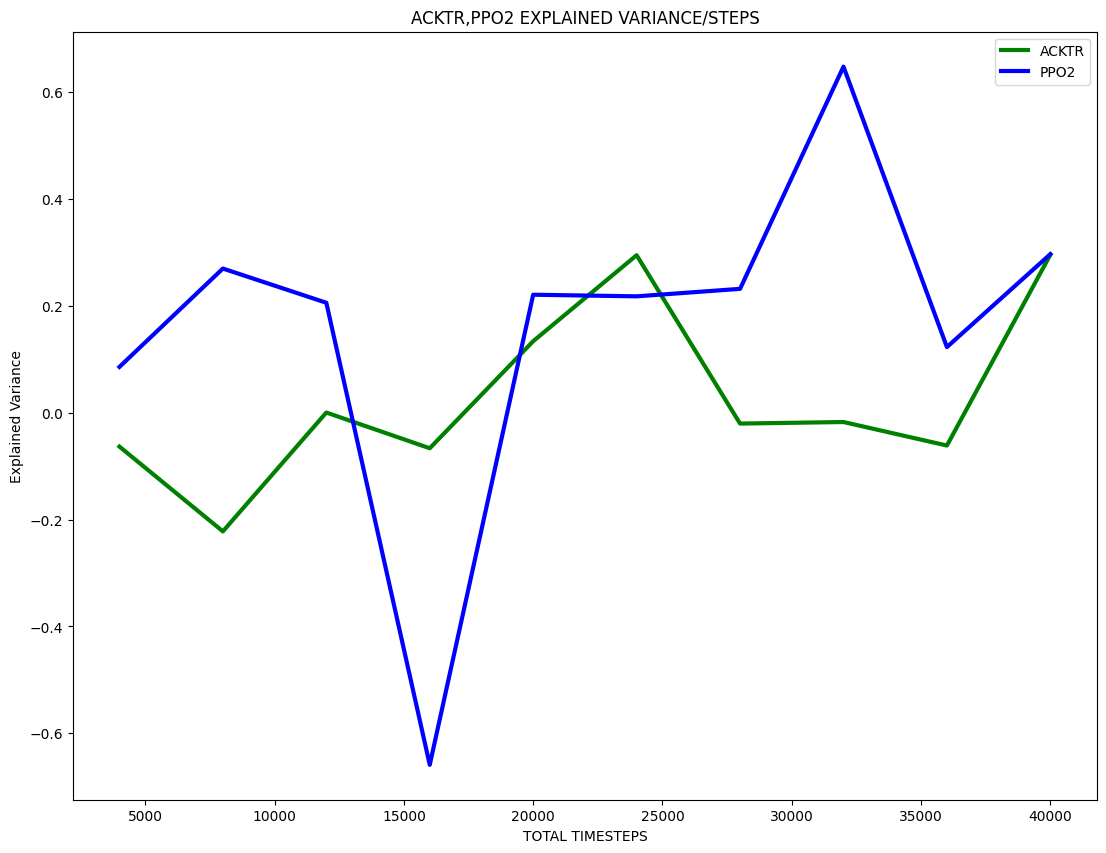

In [62]:
fig = plt.figure()
myaxes = fig.add_axes([0.1,0.1,1.6,1.6])
#myaxes.plot(Steps, A2C,'r', lw=3, label = 'A2C')
myaxes.plot(Steps, ACKTR,'green', lw=3, label = 'ACKTR')
myaxes.plot(Steps, PPO2,'blue', lw=3, label = 'PPO2')
myaxes.set_xlabel('TOTAL TIMESTEPS')
myaxes.set_ylabel('Explained Variance')
myaxes.set_title('ACKTR,PPO2 EXPLAINED VARIANCE/STEPS')
myaxes.legend()

In [77]:
data2 = pd.read_csv('data/graph.csv',delimiter=';')
data2

,STEPS,PPO,SAC,TD3,DQN,A2C
0,8000,21.7,-904,-878,20.90,60.8
1,16000,32.7,-590,-551,22.30,50.8
2,24000,64.3,443,-297,22.20,71.0
3,32000,101.0,-366,-234,21.40,127.0
4,40000,156.0,-321,-179,20.50,174.0
5,48000,206.0,-171,-163,24.20,203.0
6,56000,267.0,-147,-156,9.87,196.0
7,64000,328.0,-148,-147,9.64,189.0
8,72000,381.0,-154,-157,13.09,166.0
9,80000,427.0,-158,-170,10.30,132.0


In [78]:
A2C = data2['A2C']
PPO = data2['PPO']
SAC = data2['SAC']
TD3 = data2['TD3']
DQN = data2['DQN']
Steps = data2['STEPS']

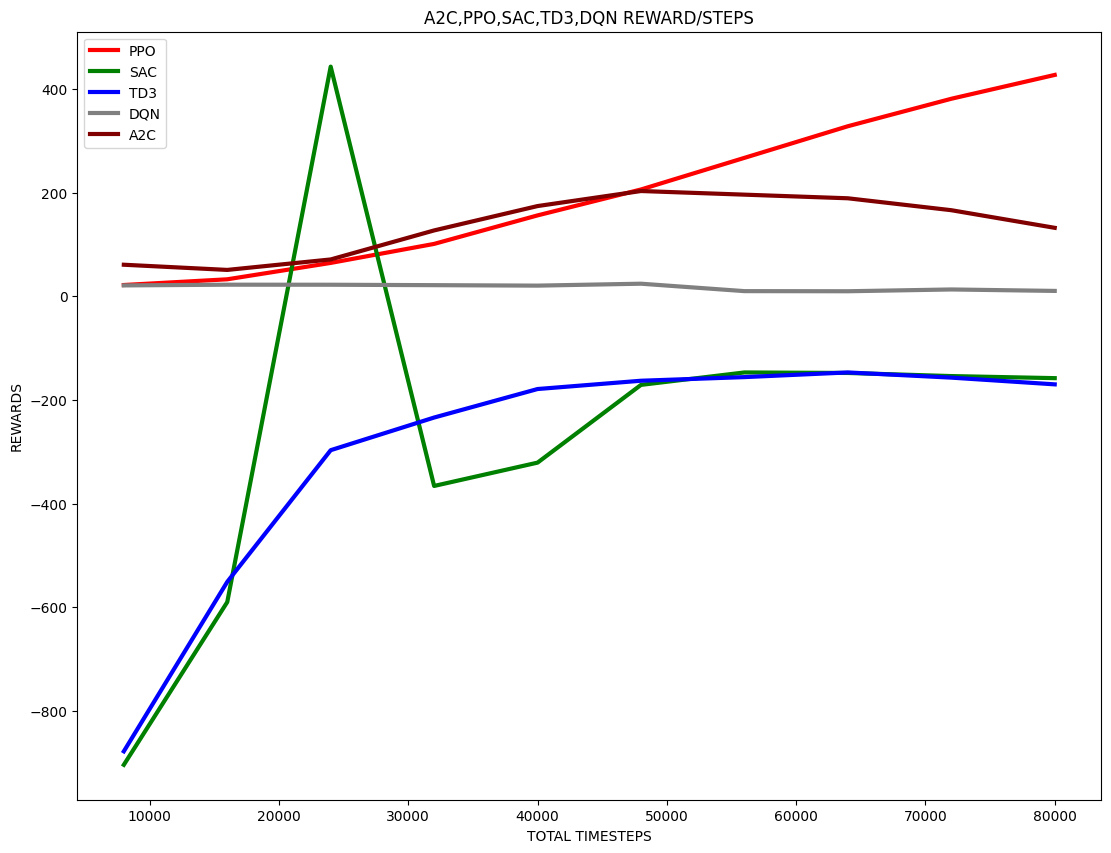

In [79]:
fig = plt.figure()
myaxes = fig.add_axes([0.1,0.1,1.6,1.6])
myaxes.plot(Steps, PPO,'red', lw=3, label = 'PPO')
myaxes.plot(Steps, SAC,'green', lw=3, label = 'SAC')
myaxes.plot(Steps, TD3,'blue', lw=3, label = 'TD3')
myaxes.plot(Steps, DQN,'gray', lw=3, label = 'DQN')
myaxes.plot(Steps,A2C,'maroon', lw=3, label = 'A2C')
myaxes.set_xlabel('TOTAL TIMESTEPS')
myaxes.set_ylabel('REWARDS')
myaxes.set_title('A2C,PPO,SAC,TD3,DQN REWARD/STEPS')
myaxes.legend()

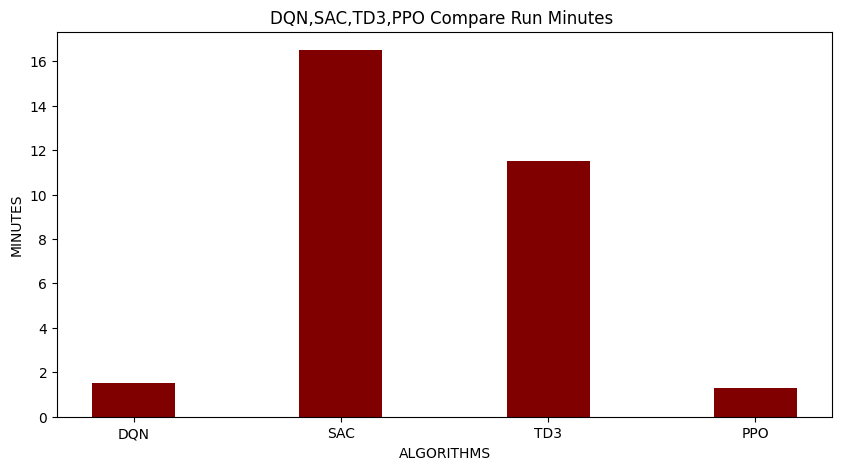

In [24]:
data = {'DQN':1.5, 'SAC':16.5, 'TD3':11.5,'PPO':1.3}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("ALGORITHMS")
plt.ylabel("MINUTES")
plt.title("DQN,SAC,TD3,PPO Compare Run Minutes ")
plt.show()

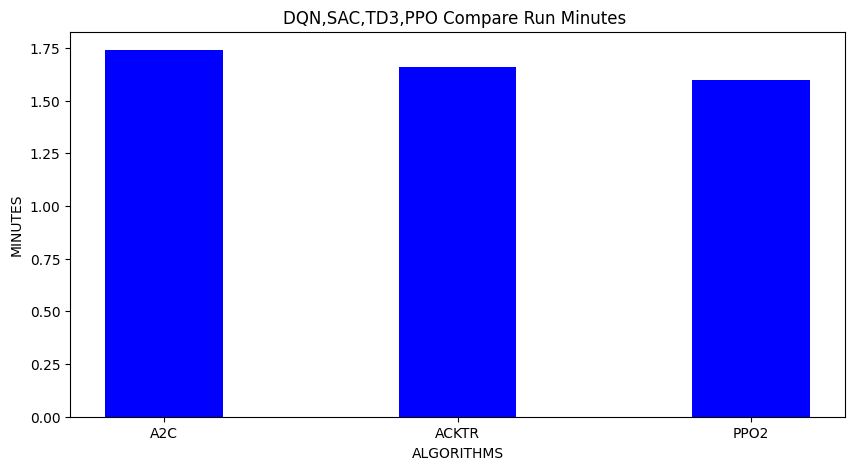

In [28]:
data = {'A2C':1.74, 'ACKTR':1.66, 'PPO2':1.6}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("ALGORITHMS")
plt.ylabel("MINUTES")
plt.title("DQN,SAC,TD3,PPO Compare Run Minutes ")
plt.show()

In [28]:
data3 = pd.read_csv('data/allGraph.csv',delimiter=';')
data3

,STEPS,ACKTR,SAC,A2C,PPO2,PPO,TD3,DQN
0,10000,-0.77000,-490,-3.4600,0.141,25.02,-751,21.9
1,20000,0.23300,-314,-0.5820,0.115,45.70,-450,21.8
2,30000,0.28500,-145,0.0282,0.345,87.30,-157,21.3
3,40000,-0.48800,-159,-0.0111,0.228,147.00,-162,21.7
4,50000,0.54700,-158,0.7410,0.368,201.40,-157,22.1
5,60000,0.33000,-144,-0.0375,0.444,270.60,-161,24.2
6,70000,0.54000,-136,0.0126,0.173,322.50,-163,25.7
7,80000,-0.80000,-139,-0.0644,0.403,408.00,-159,103.0
8,90000,0.73000,-145,0.1090,0.335,447.00,-158,189.0
9,100000,0.00857,-142,-3.2700,0.364,491.00,-163,243.0


In [22]:
PPO = data3['PPO']
SAC = data3['SAC']
TD3 = data3['TD3']
DQN = data3['DQN']
A2C = data3['A2C']
ACKTR = data3['ACKTR']
PPO2 = data3['PPO2']
Steps = data3['STEPS']

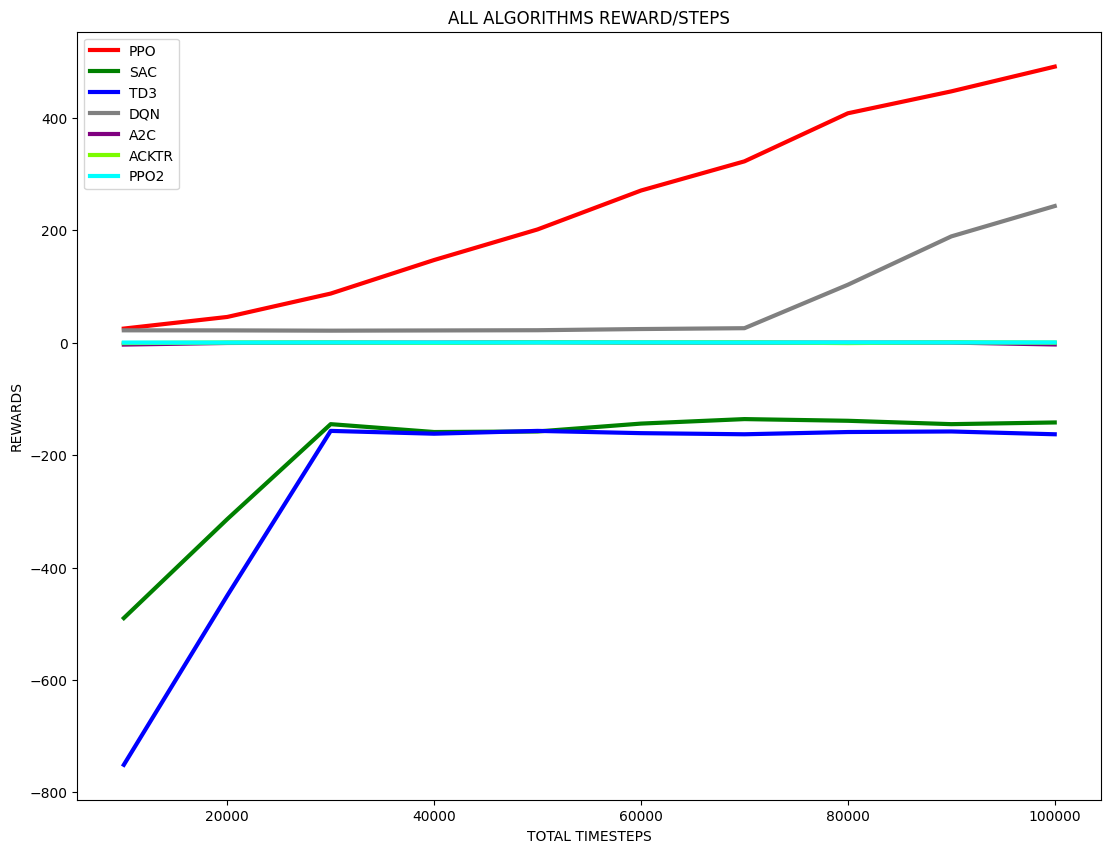

In [31]:
fig = plt.figure()
myaxes = fig.add_axes([0.1,0.1,1.6,1.6])
myaxes.plot(Steps, PPO,'red', lw=3, label = 'PPO')
myaxes.plot(Steps, SAC,'green', lw=3, label = 'SAC')
myaxes.plot(Steps, TD3,'blue', lw=3, label = 'TD3')
myaxes.plot(Steps, DQN,'gray', lw=3, label = 'DQN')
myaxes.plot(Steps, A2C,'purple', lw=3, label = 'A2C')
myaxes.plot(Steps, ACKTR,'lawngreen', lw=3, label = 'ACKTR')
myaxes.plot(Steps, PPO2,'cyan', lw=3, label = 'PPO2')
myaxes.set_xlabel('TOTAL TIMESTEPS')
myaxes.set_ylabel('REWARDS')
myaxes.set_title('ALL ALGORITHMS REWARD/STEPS')
myaxes.legend()

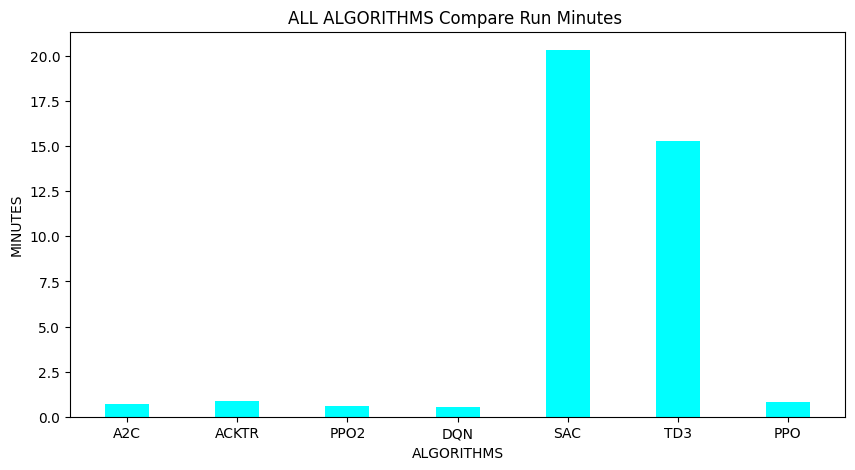

In [33]:
dataMinutes = {'A2C':0.70, 'ACKTR':0.86, 'PPO2':0.62,'DQN':0.55, 'SAC':20.33, 'TD3':15.3,'PPO':0.84}
courses = list(dataMinutes.keys())
values = list(dataMinutes.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='cyan',
        width = 0.4)
 
plt.xlabel("ALGORITHMS")
plt.ylabel("MINUTES")
plt.title("ALL ALGORITHMS Compare Run Minutes ")
plt.show()

In [ ]:
a2c ve acktr sonuçlarını entropy, reward?
excelde grafikleştirme reward a göre max yapma

q learning--sarsa--etc.
time optimizasyon karşılaştırması-- time.start ---- time.end -- print(time.end-time.start)
tüm algoritmlaarın süre bazında karşılaştırması



hiper parameter optimizasyonu (batch size, learning rate, epoch sayısı, ...)
batch size=64, 128, 256
lr= 0.001---0.0001
